# K VECINOS CERCANOS (K-NN)

**INTRODUCCIÓN**   

El problema que buscaremos trabajar en este ejercicio de práctica será el de predecir si una flor es de tipo Iris-Setosa
Iris-Versicolour ó Iris-Virginica, partiendo de los 4 features que proporciona el dataset. 

**CONTENIDO**    
1.Tips k-nn.   
2.Importación y preparación del dataset.       
3.Información general del dataset.    
4.Estadísticas y análisis.    
5.Modelo de K-NN.    
6.Evaluación del modelo.     

**TIPS K VECINOS CERCANOS**

El algoritmo (k-NN) es una forma de aprendizaje automático supervisado que se utiliza
para predecir categorías, sklearn.neighbors proporciona funcionalidad para los métodos de aprendizaje 
basados en vecinos supervisados y sin supervisión. El aprendizaje supervisado basado en vecinos se presenta en dos tipos:
*Clasificación para datos con etiquetas discretas    
*Regresión para datos con etiquetas continuas.     

El principio detrás de los métodos del vecino más cercano es encontrar un número
predefinido de ejemplos de entrenamiento más cercanos a la distancia al nuevo punto, y
predecir la etiqueta a partir de estos.

**IMPORTACIÓN Y PREPARACIÓN DEL DATASET**

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns  # seaborn para plotear 

#Modelo
# ==============================================================================
from sklearn import neighbors,datasets
from sklearn.model_selection import train_test_split #crear datos train y test
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler #para normalizar los datos

#Evaluación del modelo
# ==============================================================================
import sklearn.metrics as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

In [13]:
dataset=datasets.load_iris()
#Exploramos el dataset
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [69]:
X=dataset.data
y=dataset.target
X.shape

(150, 4)

In [87]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

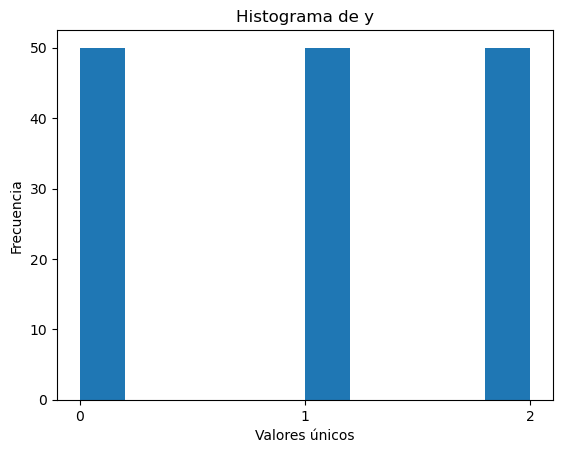

In [60]:
# Crear un histograma de la variable target
plt.hist(y)

target=np.unique(y)
# Agregar etiquetas y títulos
plt.xlabel('Valores únicos')
plt.ylabel('Frecuencia')
plt.title('Histograma de y')

plt.xticks( target, rotation=0)   #inclinacion de las etiquetas de eje x
#plt.ylim(0,500) #limite para el eje y.

# Mostrar el histograma
plt.show()

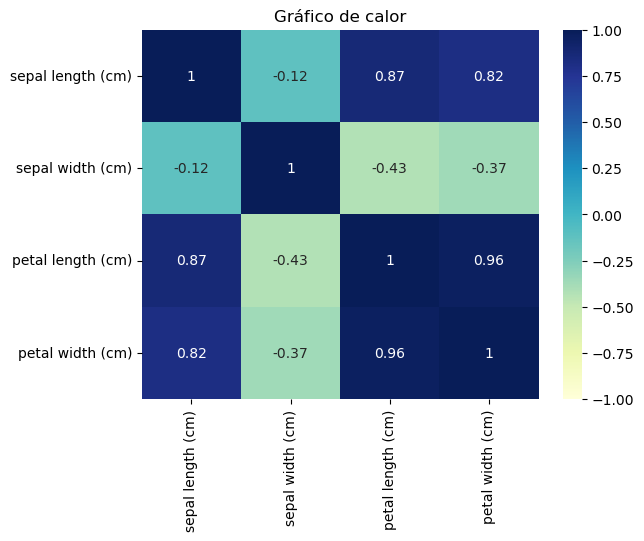

In [25]:
#graficaremos la matriz de correlación, pero observando todos los features
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
corr=df.corr()

sns.heatmap(corr,annot=True,cmap='YlGnBu',vmax=1,vmin=-1)
plt.title('Gráfico de calor')
plt.show()


In [67]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**PREPROCESAMIENTO DE LOS DATOS**

Procederemos a normalizar los datos antes de dividir los conjuntos entre entrenamiento y prueba. 

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=145, shuffle=True)

In [37]:
clasificador = neighbors.KNeighborsClassifier(n_neighbors=7)
#No hemos asignado el parámetro weights, por lo que usará el que viene por defecto que es uniform.
#1'uniform' : pesos uniformes. Todos los puntos en cada vecindario se ponderan por igual.
#2'distance' : puntos de peso por el inverso de su distancia. en este caso, los vecinos más cercanos
#de un punto de consulta tendrán una mayor influencia que los vecinos más alejados.

# Ajustamos a los datos de entrenamiento
clasificador.fit(X_train, y_train)

# Y a partir de datos de regresión encontrados
y_pred_test = clasificador.predict(X_test)


**EVALUACIÓN DEL MODELO**

Matriz de confusión: vamos a generar la misma, ya que es una herramienta interesante para evaluar el rendimiento de un modelo de clasificación, en la que se muestran los resultados de las predicciones en comparación con los valores reales.

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print('Matriz de confusión:\n', conf_matrix)

Matriz de confusión:
 [[ 7  0  0]
 [ 0 14  1]
 [ 0  0  8]]


In [40]:
# Cálculo de la precisión general del modelo
accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión general del modelo: {:.2f}".format(accuracy))

Precisión general del modelo: 0.97


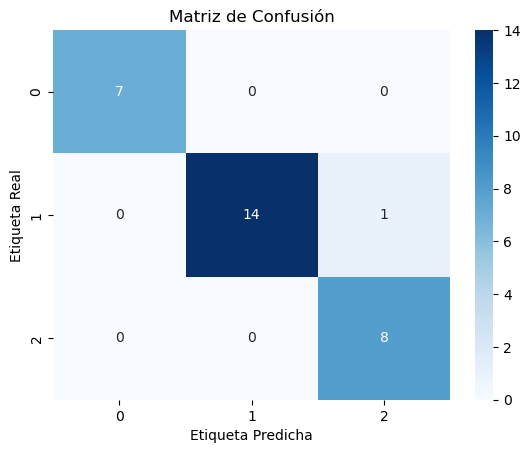

In [70]:
# Crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Agregar etiquetas y títulos
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()